# Introduction to Exploritary Data Analysis
Using Pandas!

This notebook goes along with a tutorial that can be found on the [Medallion Data Science youtube channel](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw). Click the link and subscribe for future tutorials.

# Step 0: Imports and Reading Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [13]:
df = pd.read_csv('input/train.csv')

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [14]:
df.shape

(8693, 14)

In [15]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [16]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [17]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [18]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [110]:
# Split the column into two new columns
df[['Group', 'ID']] = df['PassengerId'].str.split('_', expand=True)
df['HomePlanetId'] = df['HomePlanet'].astype(object).replace({'Earth': 1, 'Mars': 2, 'Europa': 3})

/var/folders/1j/x7vjwktn1l37ggq8qzq4phyw0000gn/T/ipykernel_21015/3125913713.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HomePlanet'] = df['HomePlanet'].astype(object).replace({'Earth': 1, 'Mars': 2, 'Europa': 3})


In [112]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,ID
0,3.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,1.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,3.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,3.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,1.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [134]:
df['CabinID'] = pd.factorize(df['Cabin'])[0]  # factorize returns (array of IDs, unique values)

df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,ID,CabinID
0,3.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,0
1,1.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1
2,3.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2
3,3.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2
4,1.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,3


In [135]:
df_filtered = df.select_dtypes(include=['number', 'bool'])

In [136]:
df_filtered.isna().sum()

HomePlanet      201
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
CabinID           0
dtype: int64

In [137]:
# Unique values
print('Home planets:', df['HomePlanet'].nunique())
print('Cabins:', df['Cabin'].nunique())
print('Destinations:', df['Destination'].nunique())

Home planets: 3
Cabins: 6560
Destinations: 3


In [138]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=['HomePlanet'])].head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,ID,CabinID
2,3.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2
3,3.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2
4,1.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,3
5,1.0,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,01,4
6,1.0,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,01,5


In [140]:
# Checking an example duplicate
df.query('HomePlanet == 1')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,ID,CabinID
1,1.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1
4,1.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,3
5,1.0,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,01,4
6,1.0,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,01,5
7,1.0,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,02,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,1.0,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True,9270,01,6551
8682,1.0,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True,9272,01,6552
8683,1.0,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False,9272,02,6553
8689,1.0,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,6557


In [141]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Group', 'ID', 'CabinID'],
      dtype='object')

In [17]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()

# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [142]:
df['HomePlanet'].value_counts()

HomePlanet
1.0    4602
3.0    2131
2.0    1759
Name: count, dtype: int64

Text(0, 0.5, 'Count')

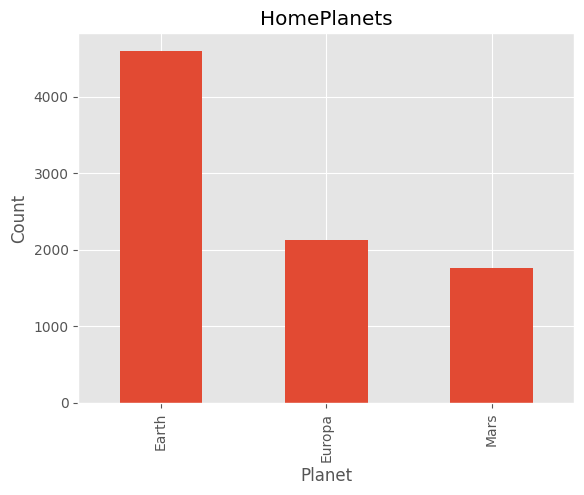

In [52]:
ax = df['HomePlanet'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='HomePlanets')
ax.set_xlabel('Planet')
ax.set_ylabel('Count')

Text(0.5, 0, 'Age')

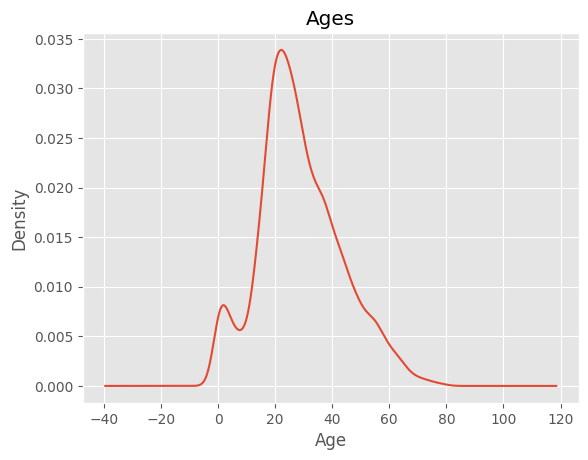

In [54]:
ax = df['Age'].plot(kind='kde',
                          title='Ages')
ax.set_xlabel('Age')

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [60]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

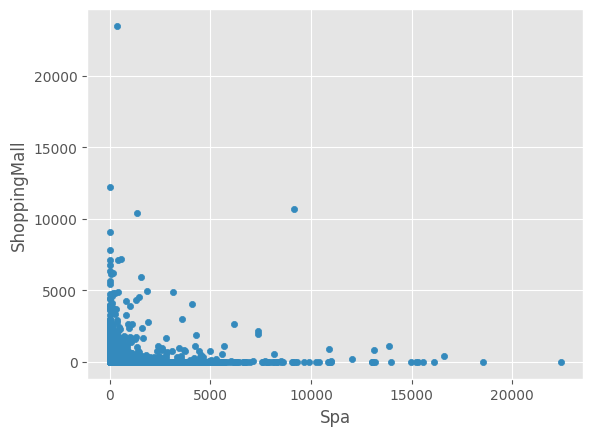

In [64]:
df.plot(kind='scatter',
        x='Spa',
        y='ShoppingMall',
        title='')
plt.show()

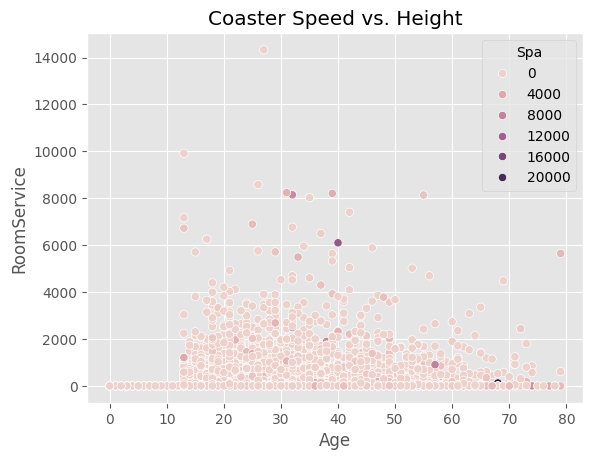

In [65]:
ax = sns.scatterplot(x='Age',
                y='RoomService',
                hue='Spa',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

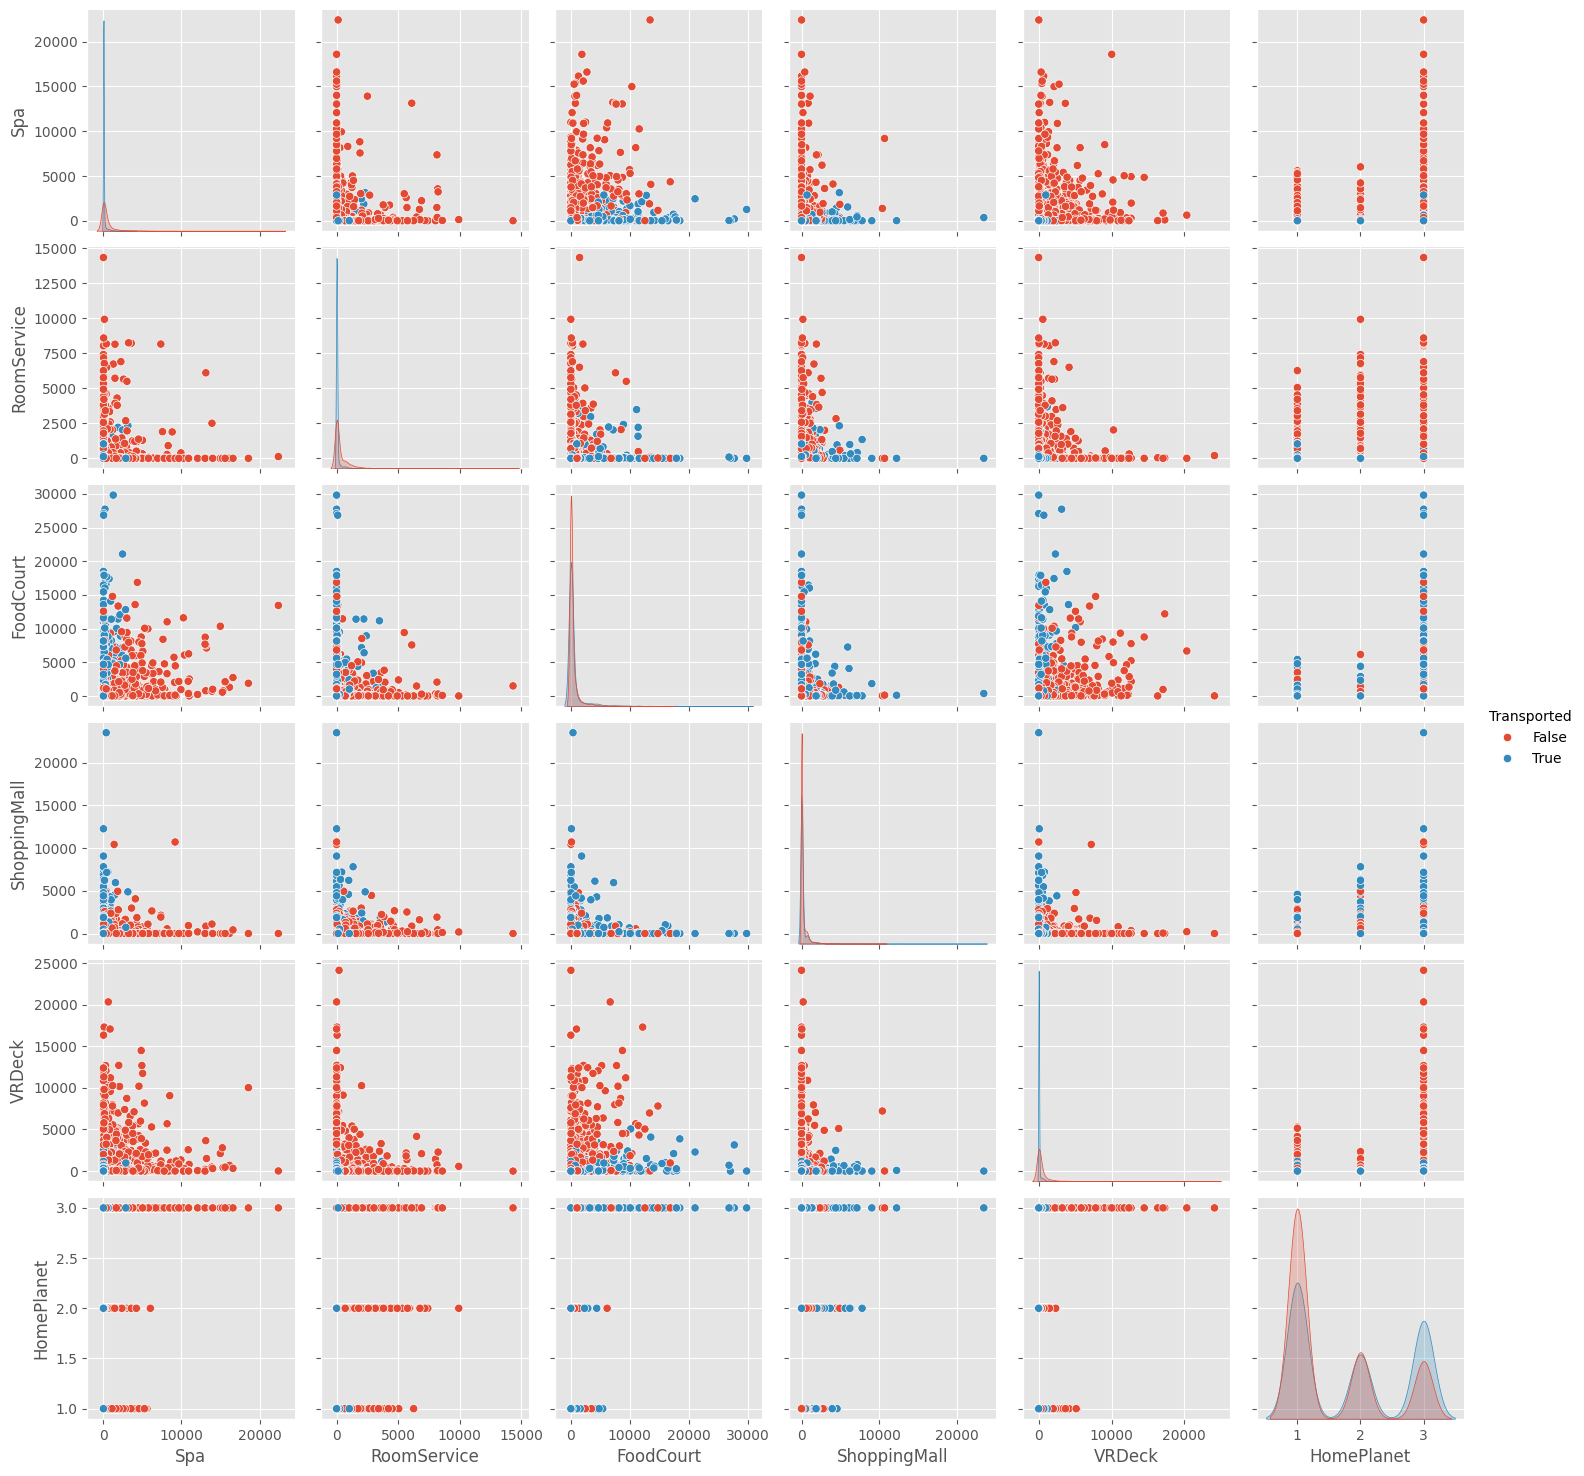

In [106]:
sns.pairplot(df,
             vars=['Spa',
                   'RoomService',
                   'FoodCourt',
                   'ShoppingMall',
                   'VRDeck',
                   'HomePlanet'],
            hue='Transported')
plt.show()

In [108]:
df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,ID
0,3.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,1.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,3.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,3.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,1.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [143]:
df_corr = df_filtered.dropna().corr()
df_corr

,HomePlanet,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinID
HomePlanet,1.000000,0.244197,0.048480,0.325597,0.031742,0.236034,0.242552,0.191660,0.000579
Age,0.244197,1.000000,0.067238,0.132466,0.031688,0.123931,0.104479,-0.080687,-0.002817
RoomService,0.048480,0.067238,1.000000,-0.015645,0.054370,0.011696,-0.017894,-0.243035,-0.004818
FoodCourt,0.325597,0.132466,-0.015645,1.000000,-0.013884,0.223763,0.223231,0.051293,-0.008958
ShoppingMall,0.031742,0.031688,0.054370,-0.013884,1.000000,0.014810,-0.003649,0.010541,0.026443
Spa,0.236034,0.123931,0.011696,0.223763,0.014810,1.000000,0.144764,-0.222839,-0.010965
VRDeck,0.242552,0.104479,-0.017894,0.223231,-0.003649,0.144764,1.000000,-0.207038,0.008516
Transported,0.191660,-0.080687,-0.243035,0.051293,0.010541,-0.222839,-0.207038,1.000000,0.021305
CabinID,0.000579,-0.002817,-0.004818,-0.008958,0.026443,-0.010965,0.008516,0.021305,1.000000


<Axes: >

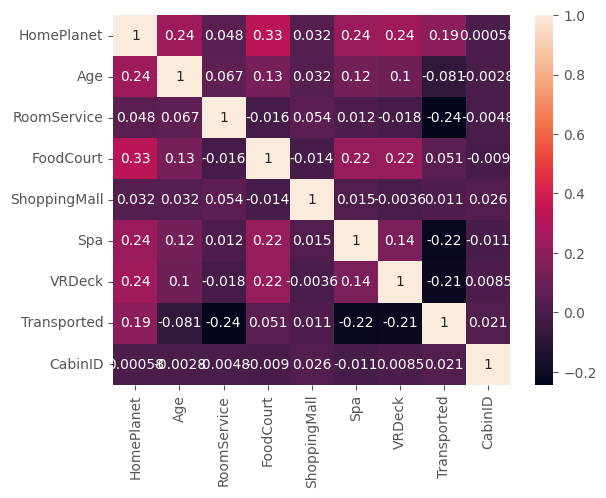

In [144]:
sns.heatmap(df_corr, annot=True)

In [147]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df_train = df_filtered.drop('Transported', axis=1)

X = df_train
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = DecisionTreeClassifier()

bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7556066705002875


# Step 5: Ask a Question about the data
- Try to answer a question you have about the data using a plot or statistic.

What are the locations with the fastest roller coasters (minimum of 10)?

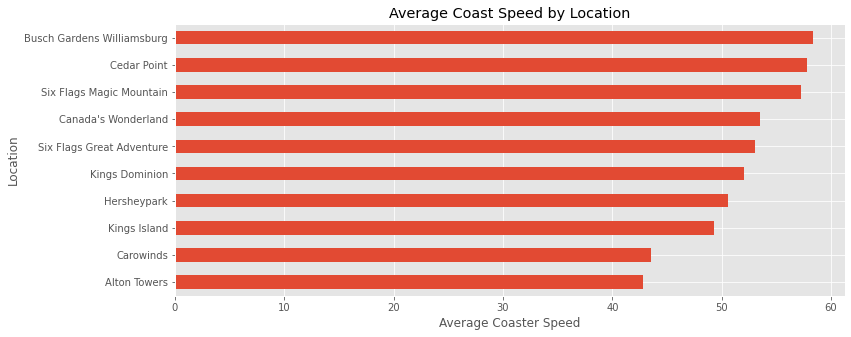

In [28]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()